<a href="https://colab.research.google.com/github/onsmognokak/hitmo/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%B0%D0%BD%D0%B4%D0%B8%D0%B4%D0%B0%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_).

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 151MB/s]


In [ ]:
!pip install SQLAlchemy==1.4.46
%load_ext sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [ ]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 50


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
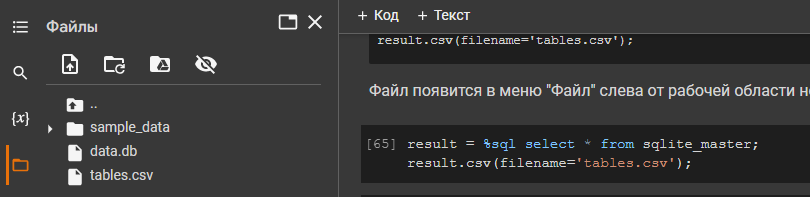

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [ ]:
%%sql
select * from task;

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
15431250,18.0,FW,2022-08-25 09:05:53,None
93508186,1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02
357853,1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32
95793266,1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52
5014541,1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47
19952848,1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01
96182364,23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21
3805464,23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32
97493497,1.0,GI,2022-08-05 05:16:54,2022-08-05 11:57:11


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [ ]:
%%sql
-- Ваше решение